In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2023-10-16 21:46:38.190745: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 21:46:38.738272: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-10-16 21:46:38.738319: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-10-16 21:46:38.738323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  # Restrict TensorFlow to only allocate 10GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
from sklearn.metrics import mean_squared_error
apply_rmse = lambda row: np.sqrt(mean_squared_error([row['specz']], [row['photoz']]))

In [4]:
combined_preds = pd.read_csv('/data2/predictions/HSC_v6_NN_neurips_combined_with_5pool_v15/testing_predictions.csv')
cnn_preds = pd.read_csv('/data2/predictions/HSC_v6_CNN5pool_v4/testing_predictions.csv')
nn_preds = pd.read_csv('/data2/predictions/HSC_v6_NN_subnetwork_v1/testing_predictions.csv')

In [5]:
combined_preds['rmse_combined'] = combined_preds.apply(apply_rmse, axis=1)
cnn_preds['rmse_cnn'] = cnn_preds.apply(apply_rmse, axis=1)
nn_preds['rmse_nn'] = nn_preds.apply(apply_rmse, axis=1)

In [6]:
cnn_preds.rename(columns={'photoz': 'photoz_cnn', 'specz': 'specz_cnn'}, inplace=True)
combined_preds.rename(columns={'photoz': 'photoz_combined', 'specz': 'specz_combined'}, inplace=True)
nn_preds.rename(columns={'photoz': 'photoz_nn', 'specz': 'specz_nn'}, inplace=True)

In [7]:
nn_preds

,photoz_nn,specz_nn,object_id,rmse_nn
0,0.260575,0.43602,36407046198803509,0.175445
1,0.233217,0.23209,36407046198804043,0.001127
2,0.531898,0.56511,36407050493759629,0.033212
3,0.546242,0.55775,36407050493773284,0.011508
4,0.452855,0.44495,36407054788744371,0.007905
...,...,...,...,...
42955,0.805346,0.76575,74649160124473935,0.039596
42956,0.894316,0.98303,74649160124493654,0.088714
42957,0.653829,0.67514,74649160124502454,0.021311
42958,2.277929,1.48162,74649164419466433,0.796309


In [8]:
df = pd.concat([combined_preds, cnn_preds, nn_preds], axis=1)

In [9]:
df

,photoz_combined,specz_combined,object_id,rmse_combined,photoz_cnn,specz_cnn,object_id,rmse_cnn,photoz_nn,specz_nn,object_id,rmse_nn
0,0.335077,0.43602,36407046198803509,0.100943,0.296801,0.43602,36407046198803509,0.139219,0.260575,0.43602,36407046198803509,0.175445
1,0.269597,0.23209,36407046198804043,0.037507,0.227248,0.23209,36407046198804043,0.004842,0.233217,0.23209,36407046198804043,0.001127
2,0.579236,0.56511,36407050493759629,0.014126,0.576909,0.56511,36407050493759629,0.011799,0.531898,0.56511,36407050493759629,0.033212
3,0.554861,0.55775,36407050493773284,0.002889,0.563230,0.55775,36407050493773284,0.005480,0.546242,0.55775,36407050493773284,0.011508
4,0.408136,0.44495,36407054788744371,0.036814,0.450492,0.44495,36407054788744371,0.005542,0.452855,0.44495,36407054788744371,0.007905
...,...,...,...,...,...,...,...,...,...,...,...,...
42955,0.827124,0.76575,74649160124473935,0.061374,0.793299,0.76575,74649160124473935,0.027549,0.805346,0.76575,74649160124473935,0.039596
42956,0.960002,0.98303,74649160124493654,0.023028,0.947519,0.98303,74649160124493654,0.035511,0.894316,0.98303,74649160124493654,0.088714
42957,0.664930,0.67514,74649160124502454,0.010210,0.690409,0.67514,74649160124502454,0.015269,0.653829,0.67514,74649160124502454,0.021311
42958,1.553415,1.48162,74649164419466433,0.071795,1.241902,1.48162,74649164419466433,0.239718,2.277929,1.48162,74649164419466433,0.796309


In [10]:
n = 300

In [11]:
cnn_best = df.sort_values(by=['rmse_cnn'], ascending=True)[:n]
cnn_worst = df.sort_values(by=['rmse_cnn'], ascending=False)[:n]
nn_best = df.sort_values(by=['rmse_nn'], ascending=True)[:n]
nn_worst = df.sort_values(by=['rmse_nn'], ascending=False)[:n]
# the index is also sorted so no mismatch issue should occur
# doesn't stay sorted unless inplace is used

In [12]:
cnn_best

,photoz_combined,specz_combined,object_id,rmse_combined,photoz_cnn,specz_cnn,object_id,rmse_cnn,photoz_nn,specz_nn,object_id,rmse_nn
39797,0.437891,0.42518,70347728902686932,0.012711,0.425180,0.42518,70347728902686932,4.720000e-07,0.424051,0.42518,70347728902686932,0.001129
39420,0.460427,0.45909,69626462159791340,0.001337,0.459092,0.45909,69626462159791340,1.756000e-06,0.452718,0.45909,69626462159791340,0.006372
31348,0.273007,0.26855,43101134981715371,0.004457,0.268547,0.26855,43101134981715371,3.069000e-06,0.550000,0.26855,43101134981715371,0.281450
10509,0.147407,0.14559,40999719152935769,0.001817,0.145586,0.14559,40999719152935769,3.807000e-06,0.169017,0.14559,40999719152935769,0.023427
17213,0.370464,0.38292,41614621030747030,0.012456,0.382916,0.38292,41614621030747030,3.847000e-06,0.421549,0.38292,41614621030747030,0.038629
...,...,...,...,...,...,...,...,...,...,...,...,...
11581,0.553662,0.58598,41104847067417714,0.032318,0.585752,0.58598,41104847067417714,2.277980e-04,0.525614,0.58598,41104847067417714,0.060366
5558,0.184451,0.17746,39605388085060336,0.006991,0.177232,0.17746,39605388085060336,2.281200e-04,0.172381,0.17746,39605388085060336,0.005079
19377,0.620152,0.62116,41698583346417158,0.001008,0.621389,0.62116,41698583346417158,2.287290e-04,0.686182,0.62116,41698583346417158,0.065022
23727,0.468992,0.46662,42266055900430672,0.002372,0.466849,0.46662,42266055900430672,2.288520e-04,0.488481,0.46662,42266055900430672,0.021861


delta cnn mean: 8.854284666664544e-06, std: 0.00013014186090709077
delta nn mean: 0.004289814641333335, std: 0.15503704302167254


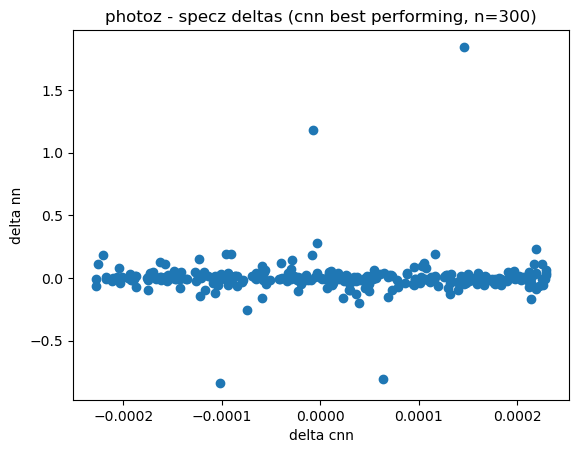

In [13]:
plt.scatter(cnn_best['photoz_cnn'] - cnn_best['specz_cnn'], cnn_best['photoz_nn'] - cnn_best['specz_nn'])
plt.xlabel('delta cnn')
plt.ylabel('delta nn')
plt.title('photoz - specz deltas (cnn best performing, n=300)')
print(f'delta cnn mean: {np.mean(cnn_best["photoz_cnn"] - cnn_best["specz_cnn"])}, std: {np.std(cnn_best["photoz_cnn"] - cnn_best["specz_cnn"])}')
print(f'delta nn mean: {np.mean(cnn_best["photoz_nn"] - cnn_best["specz_nn"])}, std: {np.std(cnn_best["photoz_nn"] - cnn_best["specz_nn"])}')

delta cnn mean: -0.240845844832, std: 1.9226301214337025
delta nn mean: -0.5424737697586667, std: 1.5708150466069326


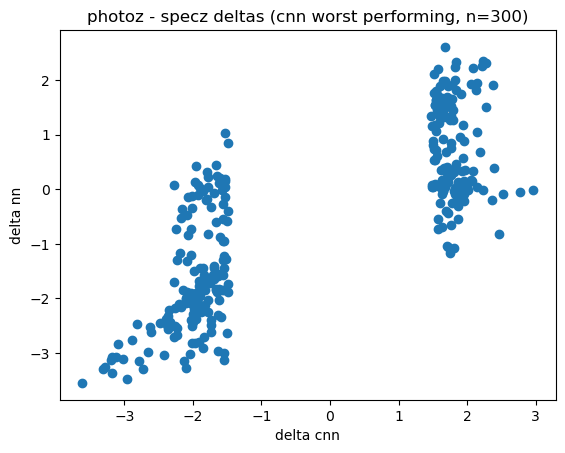

In [14]:
plt.scatter(cnn_worst['photoz_cnn'] - cnn_worst['specz_cnn'], cnn_worst['photoz_nn'] - cnn_worst['specz_nn'])
plt.xlabel('delta cnn')
plt.ylabel('delta nn')
plt.title('photoz - specz deltas (cnn worst performing, n=300)')
print(f'delta cnn mean: {np.mean(cnn_worst["photoz_cnn"] - cnn_worst["specz_cnn"])}, std: {np.std(cnn_worst["photoz_cnn"] - cnn_worst["specz_cnn"])}')
print(f'delta nn mean: {np.mean(cnn_worst["photoz_nn"] - cnn_worst["specz_nn"])}, std: {np.std(cnn_worst["photoz_nn"] - cnn_worst["specz_nn"])}')
# where the cnn under-estimated, so the nn. when the cnn over-estimated, so did the nn but to a lesser extent than the under-estimation

delta cnn mean: 8.854284666664544e-06, std: 0.00013014186090709077
delta combined mean: 0.001207615541333335, std: 0.023493640650612855


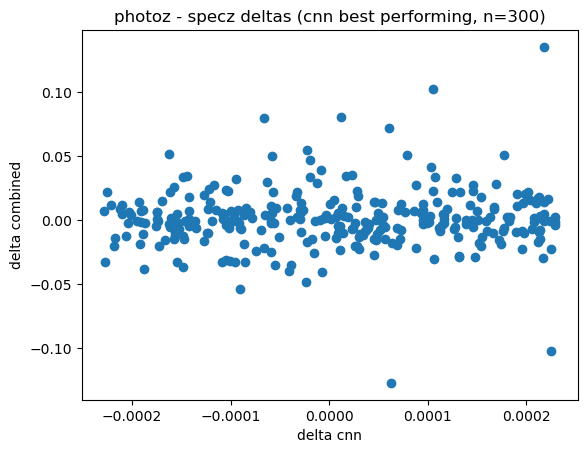

In [15]:
plt.scatter(cnn_best['photoz_cnn'] - cnn_best['specz_cnn'], cnn_best['photoz_combined'] - cnn_best['specz_combined'])
plt.xlabel('delta cnn')
plt.ylabel('delta combined')
plt.title('photoz - specz deltas (cnn best performing, n=300)')
print(f'delta cnn mean: {np.mean(cnn_best["photoz_cnn"] - cnn_best["specz_cnn"])}, std: {np.std(cnn_best["photoz_cnn"] - cnn_best["specz_cnn"])}')
print(f'delta combined mean: {np.mean(cnn_best["photoz_combined"] - cnn_best["specz_combined"])}, std: {np.std(cnn_best["photoz_combined"] - cnn_best["specz_combined"])}')

delta cnn mean: -0.240845844832, std: 1.9226301214337025
delta combined mean: -0.4421979545986666, std: 1.5378203273684827


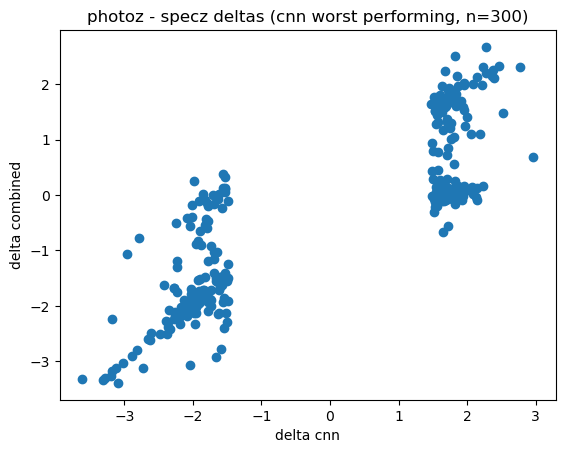

In [16]:
plt.scatter(cnn_worst['photoz_cnn'] - cnn_worst['specz_cnn'], cnn_worst['photoz_combined'] - cnn_worst['specz_combined'])
plt.xlabel('delta cnn')
plt.ylabel('delta combined')
plt.title('photoz - specz deltas (cnn worst performing, n=300)')
print(f'delta cnn mean: {np.mean(cnn_worst["photoz_cnn"] - cnn_worst["specz_cnn"])}, std: {np.std(cnn_worst["photoz_cnn"] - cnn_worst["specz_cnn"])}')
print(f'delta combined mean: {np.mean(cnn_worst["photoz_combined"] - cnn_worst["specz_combined"])}, std: {np.std(cnn_worst["photoz_combined"] - cnn_worst["specz_combined"])}')
# where the cnn under-estimated, so the combined model. when the cnn over-estimated, so did the combined model but to a lesser extent than the under-estimation

delta cnn mean: 0.007853002765999999, std: 0.03591892536490216
delta nn mean: -1.842273333338649e-07, std: 0.00019493806497473875


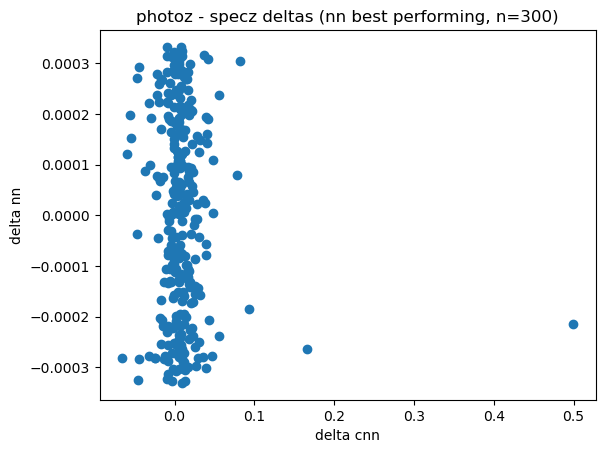

In [17]:
plt.scatter(nn_best['photoz_cnn'] - nn_best['specz_cnn'], nn_best['photoz_nn'] - nn_best['specz_nn'])
plt.xlabel('delta cnn')
plt.ylabel('delta nn')
plt.title('photoz - specz deltas (nn best performing, n=300)')
print(f'delta cnn mean: {np.mean(nn_best["photoz_cnn"] - nn_best["specz_cnn"])}, std: {np.std(nn_best["photoz_cnn"] - nn_best["specz_cnn"])}')
print(f'delta nn mean: {np.mean(nn_best["photoz_nn"] - nn_best["specz_nn"])}, std: {np.std(nn_best["photoz_nn"] - nn_best["specz_nn"])}')

delta cnn mean: -0.5367559185790001, std: 1.1336664627015982
delta nn mean: -0.8536764257393332, std: 2.350914633158062


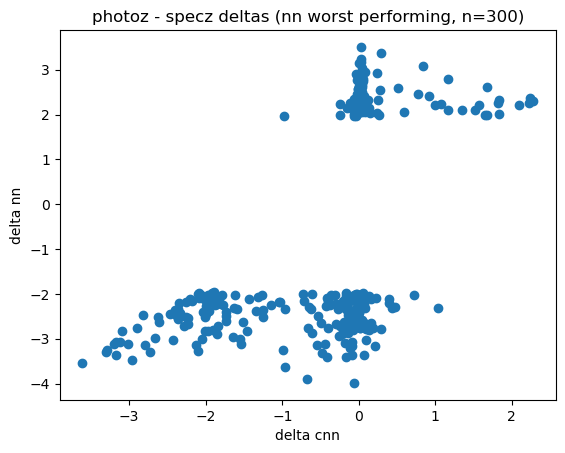

In [18]:
plt.scatter(nn_worst['photoz_cnn'] - nn_worst['specz_cnn'], nn_worst['photoz_nn'] - nn_worst['specz_nn'])
plt.xlabel('delta cnn')
plt.ylabel('delta nn')
plt.title('photoz - specz deltas (nn worst performing, n=300)')
print(f'delta cnn mean: {np.mean(nn_worst["photoz_cnn"] - nn_worst["specz_cnn"])}, std: {np.std(nn_worst["photoz_cnn"] - nn_worst["specz_cnn"])}')
print(f'delta nn mean: {np.mean(nn_worst["photoz_nn"] - nn_worst["specz_nn"])}, std: {np.std(nn_worst["photoz_nn"] - nn_worst["specz_nn"])}')
# points that underperestimated for the nn also do for the cnn. but the cnn has a notable collection of points near zero.

delta nn mean: -0.8536764257393332, std: 2.350914633158062
delta combined mean: -0.7596997839423333, std: 1.1610307781069888


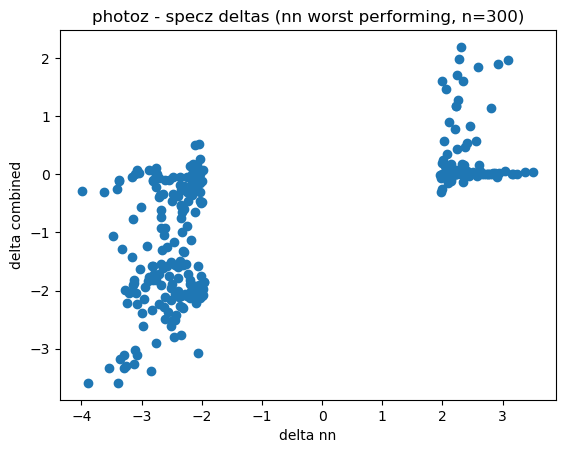

In [19]:
plt.scatter(nn_worst['photoz_nn'] - nn_worst['specz_nn'], nn_worst['photoz_combined'] - nn_worst['specz_combined'])
plt.xlabel('delta nn')
plt.ylabel('delta combined')
plt.title('photoz - specz deltas (nn worst performing, n=300)')
print(f'delta nn mean: {np.mean(nn_worst["photoz_nn"] - nn_worst["specz_nn"])}, std: {np.std(nn_worst["photoz_nn"] - nn_worst["specz_nn"])}')
print(f'delta combined mean: {np.mean(nn_worst["photoz_combined"] - nn_worst["specz_combined"])}, std: {np.std(nn_worst["photoz_combined"] - nn_worst["specz_combined"])}')
# points that underestimated for the nn also do for the combined model. some points that overestimated for the nn did so too for the combined model. but a large amount did well relative to the nn results.
# so the cnn and combined models seem more likely to underestimate when the nn does than overestimate

delta combined mean: 0.0057481922693333335, std: 0.04319844334172703
delta nn mean: -1.842273333338649e-07, std: 0.00019493806497473875


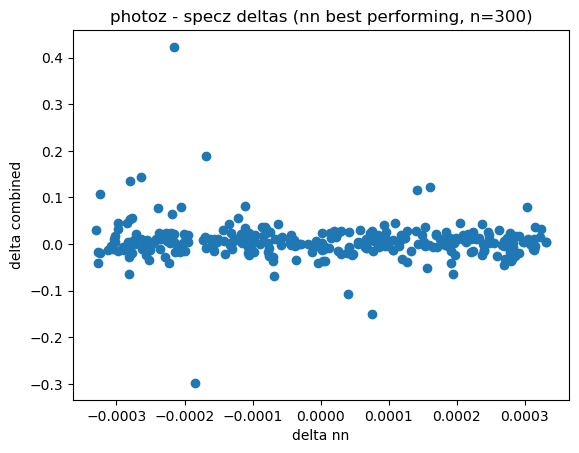

In [20]:
plt.scatter(nn_best['photoz_nn'] - nn_best['specz_nn'], nn_best['photoz_combined'] - nn_best['specz_combined'])
plt.xlabel('delta nn')
plt.ylabel('delta combined')
plt.title('photoz - specz deltas (nn best performing, n=300)')
print(f'delta combined mean: {np.mean(nn_best["photoz_combined"] - nn_best["specz_combined"])}, std: {np.std(nn_best["photoz_combined"] - nn_best["specz_combined"])}')
print(f'delta nn mean: {np.mean(nn_best["photoz_nn"] - nn_best["specz_nn"])}, std: {np.std(nn_best["photoz_nn"] - nn_best["specz_nn"])}')

In [21]:
print(f'photoz minus specz deltas')
print(f'CNN Best - CNN result: {np.mean(cnn_best["photoz_cnn"] - cnn_best["specz_cnn"])} ± {np.std(cnn_best["photoz_cnn"] - cnn_best["specz_cnn"])}')
print(f'CNN Best - NN result: {np.mean(cnn_best["photoz_nn"] - cnn_best["specz_nn"])} ± {np.std(cnn_best["photoz_nn"] - cnn_best["specz_nn"])}')
print(f'CNN Best - Combiend result: {np.mean(cnn_best["photoz_combined"] - cnn_best["specz_combined"])} ± {np.std(cnn_best["photoz_combined"] - cnn_best["specz_combined"])}')
print(f'CNN Worst - CNN result: {np.mean(cnn_worst["photoz_cnn"] - cnn_worst["specz_cnn"])} ± {np.std(cnn_worst["photoz_cnn"] - cnn_worst["specz_cnn"])}')
print(f'CNN Worst - NN result: {np.mean(cnn_worst["photoz_nn"] - cnn_worst["specz_nn"])} ± {np.std(cnn_worst["photoz_nn"] - cnn_worst["specz_nn"])}')
print(f'CNN Worst - Combiend result: {np.mean(cnn_worst["photoz_combined"] - cnn_worst["specz_combined"])} ± {np.std(cnn_worst["photoz_combined"] - cnn_worst["specz_combined"])}')
print(f'NN Best - CNN result: {np.mean(nn_best["photoz_cnn"] - nn_best["specz_cnn"])} ± {np.std(nn_best["photoz_cnn"] - nn_best["specz_cnn"])}')
print(f'NN Best - NN result: {np.mean(nn_best["photoz_nn"] - nn_best["specz_nn"])} ± {np.std(nn_best["photoz_nn"] - nn_best["specz_nn"])}')
print(f'NN Best - Combiend result: {np.mean(nn_best["photoz_combined"] - nn_best["specz_combined"])} ± {np.std(nn_best["photoz_combined"] - nn_best["specz_combined"])}')
print(f'NN Worst - CNN result: {np.mean(nn_worst["photoz_cnn"] - nn_worst["specz_cnn"])} ± {np.std(nn_worst["photoz_cnn"] - nn_worst["specz_cnn"])}')
print(f'NN Worst - NN result: {np.mean(nn_worst["photoz_nn"] - nn_worst["specz_nn"])} ± {np.std(nn_worst["photoz_nn"] - nn_worst["specz_nn"])}')
print(f'NN Worst - Combiend result: {np.mean(nn_worst["photoz_combined"] - nn_worst["specz_combined"])} ± {np.std(nn_worst["photoz_combined"] - nn_worst["specz_combined"])}')

photoz minus specz deltas
CNN Best - CNN result: 8.854284666664544e-06 ± 0.00013014186090709077
CNN Best - NN result: 0.004289814641333335 ± 0.15503704302167254
CNN Best - Combiend result: 0.001207615541333335 ± 0.023493640650612855
CNN Worst - CNN result: -0.240845844832 ± 1.9226301214337025
CNN Worst - NN result: -0.5424737697586667 ± 1.5708150466069326
CNN Worst - Combiend result: -0.4421979545986666 ± 1.5378203273684827
NN Best - CNN result: 0.007853002765999999 ± 0.03591892536490216
NN Best - NN result: -1.842273333338649e-07 ± 0.00019493806497473875
NN Best - Combiend result: 0.0057481922693333335 ± 0.04319844334172703
NN Worst - CNN result: -0.5367559185790001 ± 1.1336664627015982
NN Worst - NN result: -0.8536764257393332 ± 2.350914633158062
NN Worst - Combiend result: -0.7596997839423333 ± 1.1610307781069888


Text(0.5, 1.0, 'delta cnn-nn vs redshift (cnn best performing, n=300)')

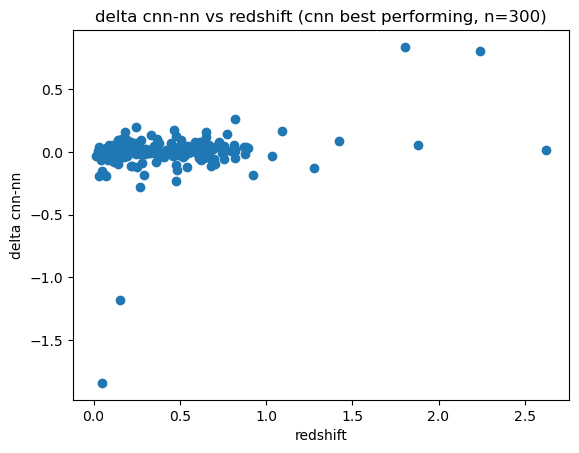

In [22]:
plt.scatter(cnn_best['specz_cnn'], cnn_best['photoz_cnn'] - cnn_best['photoz_nn'])
plt.ylabel('delta cnn-nn')
plt.xlabel('redshift')
plt.title('delta cnn-nn vs redshift (cnn best performing, n=300)')

Text(0.5, 1.0, 'delta cnn-nn vs redshift (cnn worst performing, n=300)')

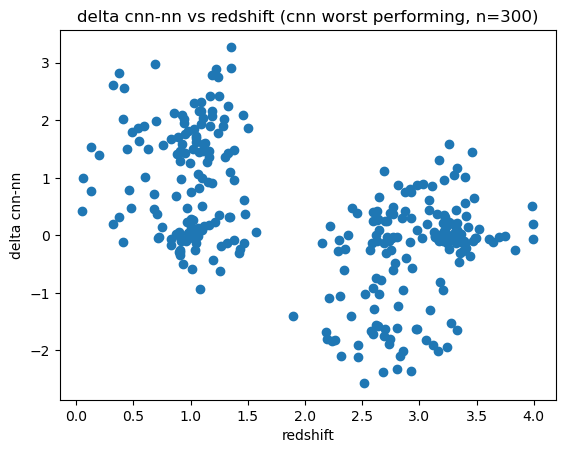

In [23]:
plt.scatter(cnn_worst['specz_cnn'], cnn_worst['photoz_cnn'] - cnn_worst['photoz_nn'])
plt.ylabel('delta cnn-nn')
plt.xlabel('redshift')
plt.title('delta cnn-nn vs redshift (cnn worst performing, n=300)')

Text(0.5, 1.0, 'delta cnn-nn vs redshift (nn best performing, n=300)')

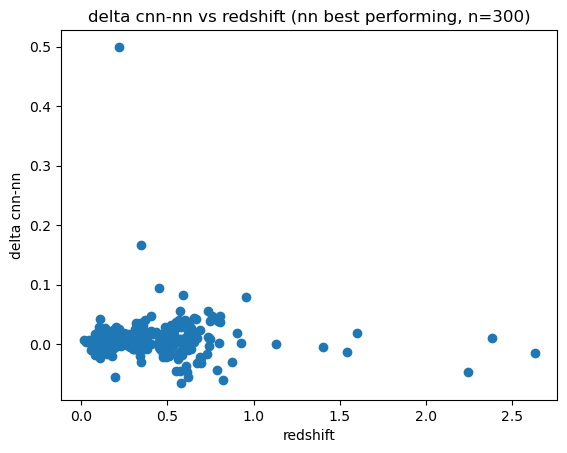

In [24]:
plt.scatter(nn_best['specz_cnn'], nn_best['photoz_cnn'] - nn_best['photoz_nn'])
plt.ylabel('delta cnn-nn')
plt.xlabel('redshift')
plt.title('delta cnn-nn vs redshift (nn best performing, n=300)')

Text(0.5, 1.0, 'delta cnn-nn vs redshift (nn worst performing, n=300)')

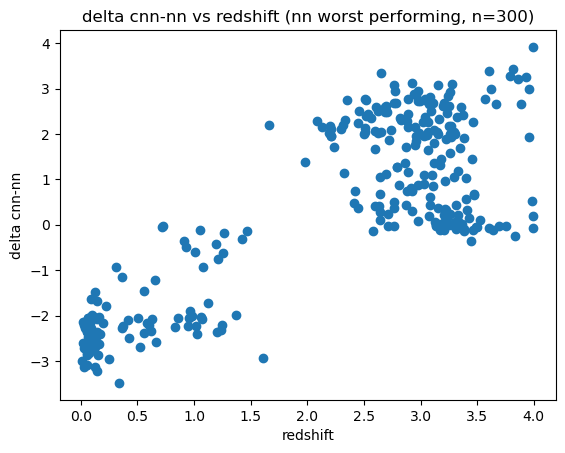

In [25]:
plt.scatter(nn_worst['specz_cnn'], nn_worst['photoz_cnn'] - nn_worst['photoz_nn'])
plt.ylabel('delta cnn-nn')
plt.xlabel('redshift')
plt.title('delta cnn-nn vs redshift (nn worst performing, n=300)')

Text(0.5, 1.0, 'delta cnn-combined vs redshift (cnn worst performing, n=300)')

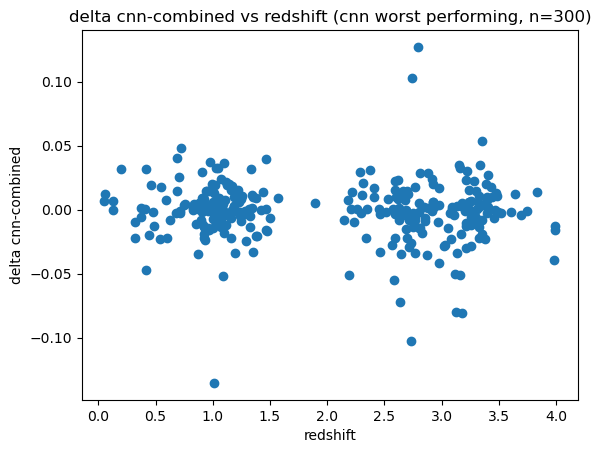

In [26]:
plt.scatter(cnn_worst['specz_cnn'], cnn_best['photoz_cnn'] - cnn_best['photoz_combined'])
plt.ylabel('delta cnn-combined')
plt.xlabel('redshift')
plt.title('delta cnn-combined vs redshift (cnn worst performing, n=300)')

Text(0.5, 1.0, 'delta cnn-combined vs redshift (cnn worst performing, n=300)')

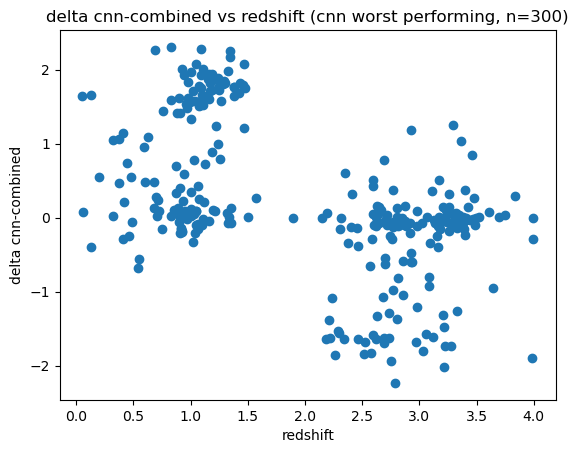

In [27]:
plt.scatter(cnn_worst['specz_cnn'], cnn_worst['photoz_cnn'] - cnn_worst['photoz_combined'])
plt.ylabel('delta cnn-combined')
plt.xlabel('redshift')
plt.title('delta cnn-combined vs redshift (cnn worst performing, n=300)')

Text(0.5, 1.0, 'delta nn-combined vs redshift (nn best performing, n=300)')

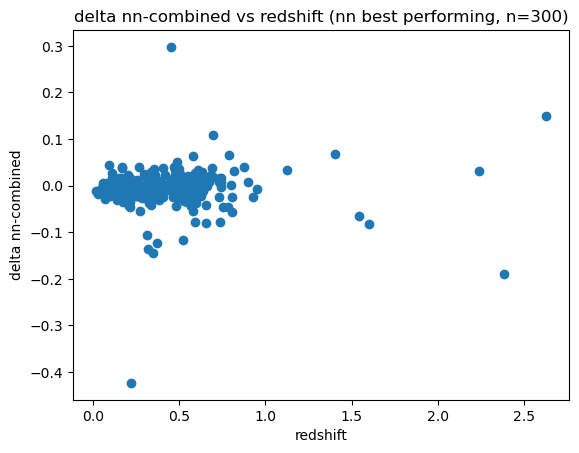

In [28]:
plt.scatter(nn_best['specz_cnn'], nn_best['photoz_nn'] - nn_best['photoz_combined'])
plt.ylabel('delta nn-combined')
plt.xlabel('redshift')
plt.title('delta nn-combined vs redshift (nn best performing, n=300)')

Text(0.5, 1.0, 'delta nn-combined vs redshift (nn worst performing, n=300)')

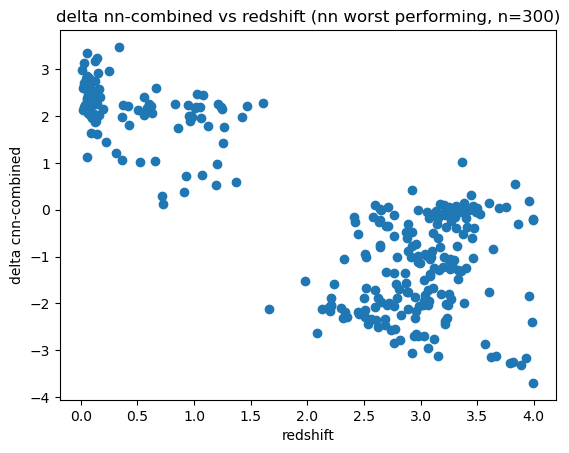

In [29]:
plt.scatter(nn_worst['specz_cnn'], nn_worst['photoz_nn'] - nn_worst['photoz_combined'])
plt.ylabel('delta cnn-combined')
plt.xlabel('redshift')
plt.title('delta nn-combined vs redshift (nn worst performing, n=300)')